# Taylor Woodington
# Term Project Milestone 1
# DSC550

## Milestone 1

For my business model, I decided to do a comparison between streaming apps that a large percentage of the population are using today. I acquired my dataset from Kaggle using the following link: https://www.kaggle.com/datasets/ruchi798/movies-on-netflix-prime-video-hulu-and-disney. The dataset is named “Movies on Netflix, Prime Video, Hulu and Disney+”. The dataset will show an individual id for a movie, the movie title, the year released, age range for movie, a score out of 100 on rotten tomatoes, and which streaming app the movie is on. In this analysis, I plan to compare the amount of movies there are on each streaming network and compare the amount of “excellent” movies there are on each. The “excellent” movies will be classified with a rating from rotten tomatoes above 85% out of 100. Many individuals tend to have a difficult time with how much subscriptions cost these days and may not like to subscribe to every streaming application there is, this analysis will be able to assist those looking for what they may consider as the best streaming app with the most enjoyable movies. From a business standpoint, this could be useful for all companies being analyzed in this process. Each streaming network has an advantage of looking at the competition, and if they are considered a “better” streaming device or more preferred. For a viewer, many would prefer to have a streaming service which includes many movies, and many good movies. If a streaming service has a lot of movies, but not a lot of good movies, a viewer may still want a different streaming platform. In this case, each streaming service will be able to see where they fall in a possible ranking with the others, and the possible reasons they may be in that position. It can raise further questions of what they can do to make their service more appealing to the average user and increase use overall.

-Question(s): Which streaming platform is more appealing based off amount of movies and amount of "good" movies? 

-Target: Business individuals a part of the streaming platform companies
(Possibly users of the platforms as well)

In [1]:
# Necessary Imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r'C:\Users\Shaun\Downloads\streaming_platforms.csv')

# Ensure it loaded properly
print(df.head(10))

   Unnamed: 0  ID                                     Title  Year  Age  \
0           0   1                              The Irishman  2019  18+   
1           1   2                                    Dangal  2016   7+   
2           2   3  David Attenborough: A Life on Our Planet  2020   7+   
3           3   4         Lagaan: Once Upon a Time in India  2001   7+   
4           4   5                                      Roma  2018  18+   
5           5   6         To All the Boys I've Loved Before  2018  13+   
6           6   7                        The Social Dilemma  2020  13+   
7           7   8                                      Okja  2017  13+   
8           8   9              The Ballad of Buster Scruggs  2018  16+   
9           9  10                The Trial of the Chicago 7  2020  18+   

  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  
0          98/100        1     0            0        0     0  
1          97/100        1     0            0        0     

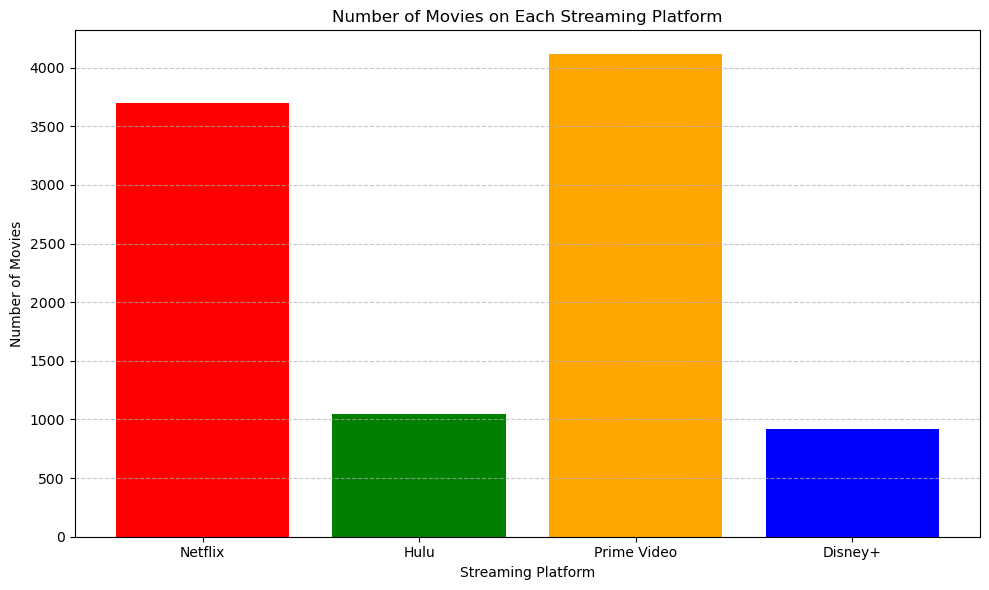

In [2]:
# Number of Movies on Each Streaming Platform
# Count movies on each platform
netflix_count = df['Netflix'].sum()
hulu_count = df['Hulu'].sum()
prime_video_count = df['Prime Video'].sum()
disney_plus_count = df['Disney+'].sum()

# Plotting
platforms = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
counts = [netflix_count, hulu_count, prime_video_count, disney_plus_count]

plt.figure(figsize=(10, 6))
plt.bar(platforms, counts, color=['red', 'green', 'orange', 'blue'])
plt.title('Number of Movies on Each Streaming Platform')
plt.xlabel('Streaming Platform')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The graph above is a simple bargraph that shows which streaming platform has the most movies and how they compare to one another. In this visual, it is heavily shown that Prime Video and Netflix have the most movies available for watching but Prime Video has the most. 

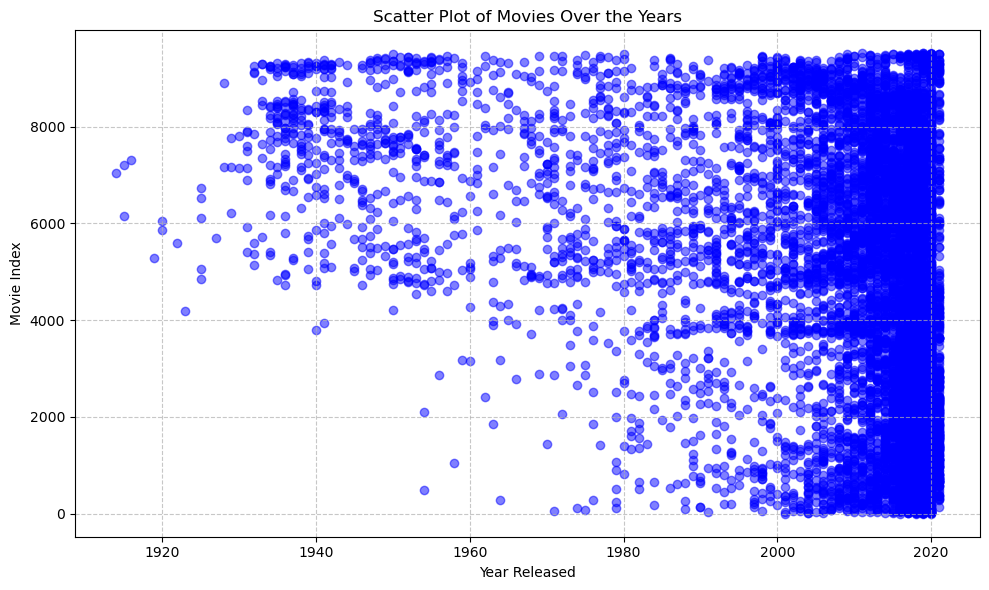

In [3]:
# Scatter Plot of Movies oer the Years
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df.index, color='blue', alpha=0.5)
plt.title('Scatter Plot of Movies Over the Years')
plt.xlabel('Year Released')
plt.ylabel('Movie Index')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This scatter plot is of the movies over the years, and how many movies were released within each year of the dataset. In the plot above, it shows that most of the movies released were in the 2000's and specifically later 2000's which could appeal to a specific demographic that is looking for newer movies.

In [4]:
# Editing the dataframe Ratings to be formatted for easier future use
# Splitting the column and extracting the first part
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.split('/').str[0]

# Rename the column if needed
df = df.rename(columns={'Rotten Tomatoes': 'Rotten Tomatoes Rating'})

# Display the updated DataFrame
print(df)

      Unnamed: 0    ID                                     Title  Year  Age  \
0              0     1                              The Irishman  2019  18+   
1              1     2                                    Dangal  2016   7+   
2              2     3  David Attenborough: A Life on Our Planet  2020   7+   
3              3     4         Lagaan: Once Upon a Time in India  2001   7+   
4              4     5                                      Roma  2018  18+   
...          ...   ...                                       ...   ...  ...   
9510        9510  9511                        Most Wanted Sharks  2020  NaN   
9511        9511  9512             Doc McStuffins: The Doc Is In  2020  NaN   
9512        9512  9513                     Ultimate Viking Sword  2019  NaN   
9513        9513  9514           Hunt for the Abominable Snowman  2011  NaN   
9514        9514  9515       Women of Impact: Changing the World  2019   7+   

     Rotten Tomatoes Rating  Netflix  Hulu  Prime V

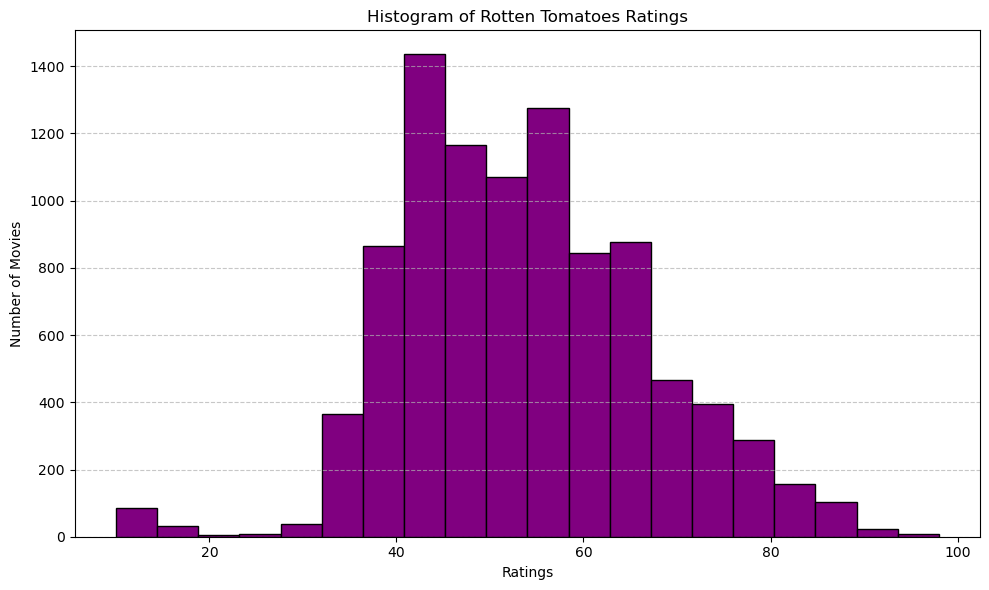

In [5]:
# A Histogram of the Ratings Overall
# Convert 'Rotten Tomatoes Rating' column to numeric (if it's not already)
df['Rotten Tomatoes Rating'] = pd.to_numeric(df['Rotten Tomatoes Rating'], errors='coerce')

# Drop rows with NaN ratings (if any)
df.dropna(subset=['Rotten Tomatoes Rating'], inplace=True)

# Plot histogram of ratings
plt.figure(figsize=(10, 6))
plt.hist(df['Rotten Tomatoes Rating'], bins=20, color='purple', edgecolor='black')
plt.title('Histogram of Rotten Tomatoes Ratings')
plt.xlabel('Ratings')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Above is a histogram of Ratings compared to the number of movies for each rating. We see that the ratings fall mainly between 40 and 80, with not many ratings being above an 85 out of 100 like we were originally looking for.

C:\Users\Shaun\AppData\Local\Temp\ipykernel_17420\2749570434.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['Rotten Tomatoes Rating'] = pd.to_numeric(netflix_movies['Rotten Tomatoes Rating'], errors='coerce')
C:\Users\Shaun\AppData\Local\Temp\ipykernel_17420\2749570434.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies.dropna(subset=['Rotten Tomatoes Rating'], inplace=True)


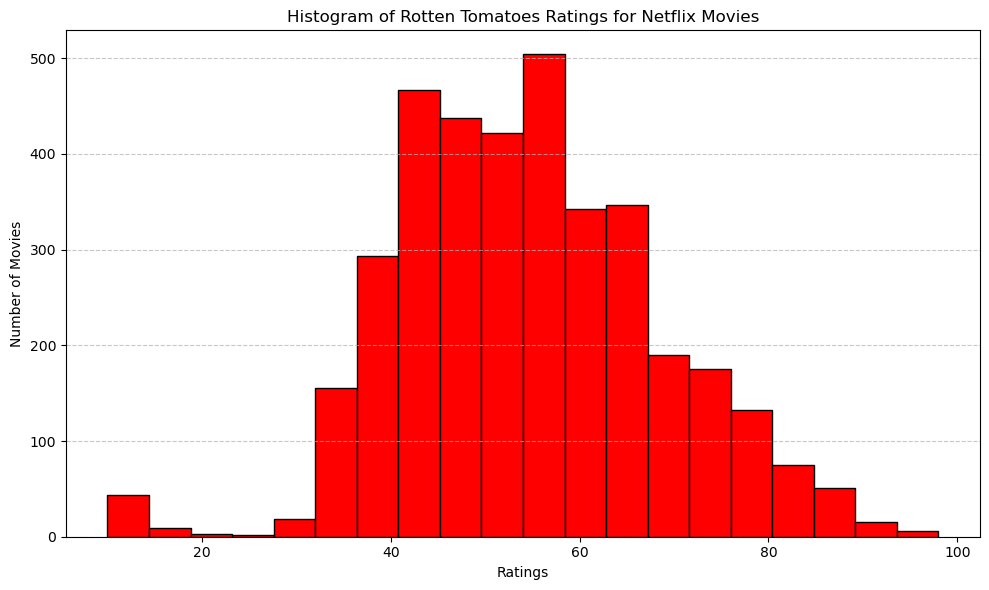

In [6]:
# Netflix Movie Ratings
# Filter dataframe for Netflix movies
netflix_movies = df[df['Netflix'] == 1]

# Convert 'Rotten Tomatoes Rating' column to numeric (if it's not already)
netflix_movies['Rotten Tomatoes Rating'] = pd.to_numeric(netflix_movies['Rotten Tomatoes Rating'], errors='coerce')

# Drop rows with NaN ratings (if any)
netflix_movies.dropna(subset=['Rotten Tomatoes Rating'], inplace=True)

# Plot histogram of Netflix movie ratings
plt.figure(figsize=(10, 6))
plt.hist(netflix_movies['Rotten Tomatoes Rating'], bins=20, color='red', edgecolor='black')
plt.title('Histogram of Rotten Tomatoes Ratings for Netflix Movies')
plt.xlabel('Ratings')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Above is a Histogram of the netflix movies specifically and where their ratings are. Here we notice a little more of an even distribution with a slight skew. It looks very similar to the ratings overall histogram.

C:\Users\Shaun\AppData\Local\Temp\ipykernel_17420\1294486938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prime_video_movies['Rotten Tomatoes Rating'] = pd.to_numeric(prime_video_movies['Rotten Tomatoes Rating'], errors='coerce')
C:\Users\Shaun\AppData\Local\Temp\ipykernel_17420\1294486938.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prime_video_movies.dropna(subset=['Rotten Tomatoes Rating'], inplace=True)


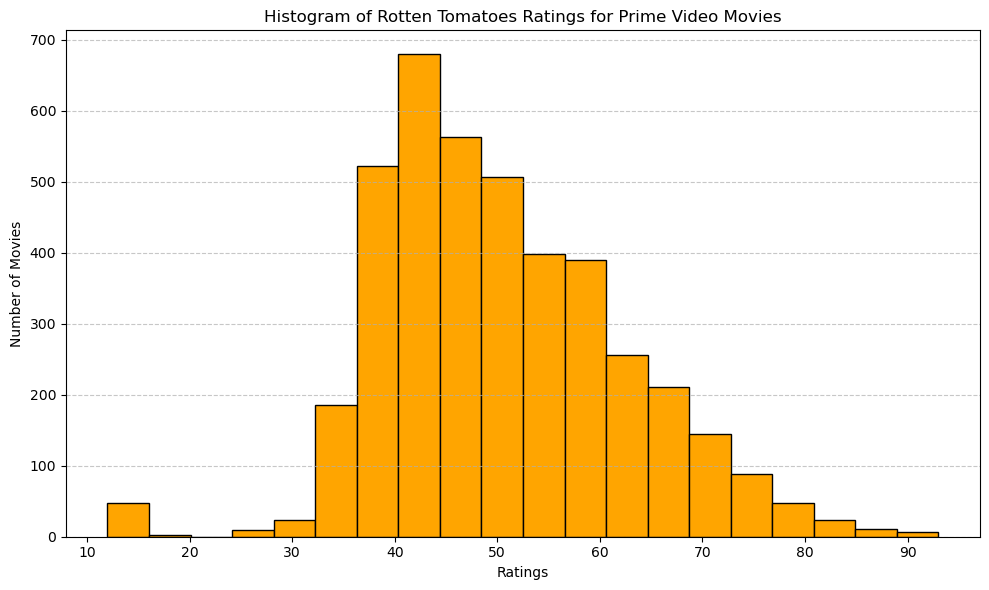

In [7]:
# Filter dataframe for Prime Video movies
prime_video_movies = df[df['Prime Video'] == 1]

# Convert 'Rotten Tomatoes Rating' column to numeric (if it's not already)
prime_video_movies['Rotten Tomatoes Rating'] = pd.to_numeric(prime_video_movies['Rotten Tomatoes Rating'], errors='coerce')

# Drop rows with NaN ratings (if any)
prime_video_movies.dropna(subset=['Rotten Tomatoes Rating'], inplace=True)

# Plot histogram of Prime Video movie ratings
plt.figure(figsize=(10, 6))
plt.hist(prime_video_movies['Rotten Tomatoes Rating'], bins=20, color='orange', edgecolor='black')
plt.title('Histogram of Rotten Tomatoes Ratings for Prime Video Movies')
plt.xlabel('Ratings')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The above graph is a histogram of the Prime Video Movies ratings, it shows a similar trend to the ones above with not many movies being rated above an 85 out of 100. However, this graph does show to have less movies rated at an 85 and above than Netflix, and it shows to have a skew to the slightly more negative reviews than Netflix does. Showing some supportive evidence that Netflix may have more well rounded movies than Prime Video.

Overall, by making the few graphs above for a graphical analysis I notice a few things to use moving forward in deeper analysis. I notice that most of the movies were made within later 2000's giving possible insight to focus more on just those movies in the future, possibly cleaning the data down a little more. I also notice that many of the movies in the dataset were from Netflix and Prime Video, suggesting for future analysis to narrow in on the comparison between those two streaming platforms specifically. So moving forward I made a histogram of each for the ratings after cleaning up some of the data. I found that Netflix seems to have a little more of a normal distribution when it comes to scores whereas Prime Video has a slight skew to negative scores. This gives me more ideas moving forward to compare Netflix movie ratins and Prime Video movie ratings in a possible model which would compare any relationship between them.

## Milestone 2

Updates for the project: The goal of this project is to see which streaming service of the four being analyzed are the "better" service. The ones considered "better" will be services where there is shown to be a relationship with higher reviews on movies. As of right now models will be done to see the relationship between ratings of movies and the streaming service, as well as a model like a decision tree to identify which streaming service and age groups are more likely to have higher ratings. The model target for my analysis is the companies who own the streaming services, more specifically those in charge of increasing subscribers to the streaming service. My analysis should be able to show which streaming service has a higher relationship with better reviewed movies. It would also show which movie age groups have better reviews to indicate the kind of audience that the streaming service should be advertising to or to change their ways for the age groups they are not advertising to. Overall, the analysis will be able to show streaming services which areas need to be worked on, whether that be better rated movies associated with the streaming service, or more movies with a better rating for specific age groups. 

In [8]:
print(df.head(10))

   Unnamed: 0  ID                                     Title  Year  Age  \
0           0   1                              The Irishman  2019  18+   
1           1   2                                    Dangal  2016   7+   
2           2   3  David Attenborough: A Life on Our Planet  2020   7+   
3           3   4         Lagaan: Once Upon a Time in India  2001   7+   
4           4   5                                      Roma  2018  18+   
5           5   6         To All the Boys I've Loved Before  2018  13+   
6           6   7                        The Social Dilemma  2020  13+   
7           7   8                                      Okja  2017  13+   
8           8   9              The Ballad of Buster Scruggs  2018  16+   
9           9  10                The Trial of the Chicago 7  2020  18+   

   Rotten Tomatoes Rating  Netflix  Hulu  Prime Video  Disney+  Type  
0                    98.0        1     0            0        0     0  
1                    97.0        1     0   

In [9]:
# Check for duplicates in the "Title" column to ensure that models are not biased from duplicates of the same movie
duplicates = df[df['Title'].duplicated(keep=False)]

print('Duplicates:', duplicates)

Duplicates: Empty DataFrame
Columns: [Unnamed: 0, ID, Title, Year, Age, Rotten Tomatoes Rating, Netflix, Hulu, Prime Video, Disney+, Type]
Index: []


In [10]:
# Drop the 'Title' column and random 'Type' column
df_notype = df.drop(columns='Type')
df_notitle = df_notype.drop(columns='Title')

# Ensure the column has been removed
print(df_notitle.head(10))

   Unnamed: 0  ID  Year  Age  Rotten Tomatoes Rating  Netflix  Hulu  \
0           0   1  2019  18+                    98.0        1     0   
1           1   2  2016   7+                    97.0        1     0   
2           2   3  2020   7+                    95.0        1     0   
3           3   4  2001   7+                    94.0        1     0   
4           4   5  2018  18+                    94.0        1     0   
5           5   6  2018  13+                    94.0        1     0   
6           6   7  2020  13+                    93.0        1     0   
7           7   8  2017  13+                    92.0        1     0   
8           8   9  2018  16+                    92.0        1     0   
9           9  10  2020  18+                    92.0        1     0   

   Prime Video  Disney+  
0            0        0  
1            0        0  
2            0        0  
3            0        0  
4            0        0  
5            0        0  
6            0        0  
7         

I wanted to check if there were any title duplicates to remove the movies if they were mentioned multiple times. Above shows that there are no duplicates for the movies being reviewed for any of the streams, so we are going to delete the "title" column because there is a separate column that identifies the individual movies labeled as "ID". It is not necessary to have multiple columns that represent the individual movies for this analysis. As for the 'Type' column, this column was one I accidentally had added previously that had no values under it, so it serves no purpose to the analysis. 

In [11]:
# Check for missing values in the streaming service columns, ratings and age columns
missing_values = df_notitle[['Rotten Tomatoes Rating', 'Age','Netflix', 'Hulu', 'Prime Video', 'Disney+']].isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
Rotten Tomatoes Rating       0
Age                       4170
Netflix                      0
Hulu                         0
Prime Video                  0
Disney+                      0
dtype: int64


Here I checked for missing values in some of the very important columns and found that the only column with missing values was the age column. 

In [12]:
# Convert the Age column to have values seen as numbers without the age having a + at the end and replace missing values with average age
# Convert 'Age' column to string to ensure .str operations can be used
df_notitle['Age'] = df_notitle['Age'].astype(str)

# Remove non-numeric characters, replacing '+' and other characters
df_notitle['Age'] = df_notitle['Age'].str.replace(r'[^0-9]', '', regex=True)

# Convert 'Age' to numeric, coercing errors to NaN
df_notitle['Age'] = pd.to_numeric(df_notitle['Age'], errors='coerce')

# Calculate the average age
average_age = df_notitle['Age'].mean()

# Fill NaN values in 'Age' with the average age
df_notitle['Age'].fillna(average_age, inplace=True)

# Convert 'Age' to integer
df_notitle['Age'] = df_notitle['Age'].astype(int)

# Check dataframe after changes
print("\nDataFrame after cleaning and filling 'Age':")
print(df_notitle)


DataFrame after cleaning and filling 'Age':
      Unnamed: 0    ID  Year  Age  Rotten Tomatoes Rating  Netflix  Hulu  \
0              0     1  2019   18                    98.0        1     0   
1              1     2  2016    7                    97.0        1     0   
2              2     3  2020    7                    95.0        1     0   
3              3     4  2001    7                    94.0        1     0   
4              4     5  2018   18                    94.0        1     0   
...          ...   ...   ...  ...                     ...      ...   ...   
9510        9510  9511  2020   14                    14.0        0     0   
9511        9511  9512  2020   14                    13.0        0     0   
9512        9512  9513  2019   14                    13.0        0     0   
9513        9513  9514  2011   14                    10.0        0     0   
9514        9514  9515  2019    7                    10.0        0     0   

      Prime Video  Disney+  
0            

In [13]:
# Double check for any missing values after the change
missing_values_age = df_notitle[['Age']].isnull().sum()

# Print missing values for "Age" column
print("\nMissing Values for Updated Age Column:")
print(missing_values_age)


Missing Values for Updated Age Column:
Age    0
dtype: int64


In [14]:
# Rename the column "Age" to now be "Minimum Age Requried"
df_notitle.rename(columns={'Age': 'Minimum Age Required'}, inplace=True)

# Check changes
print(df_notitle.head(10))

   Unnamed: 0  ID  Year  Minimum Age Required  Rotten Tomatoes Rating  \
0           0   1  2019                    18                    98.0   
1           1   2  2016                     7                    97.0   
2           2   3  2020                     7                    95.0   
3           3   4  2001                     7                    94.0   
4           4   5  2018                    18                    94.0   
5           5   6  2018                    13                    94.0   
6           6   7  2020                    13                    93.0   
7           7   8  2017                    13                    92.0   
8           8   9  2018                    16                    92.0   
9           9  10  2020                    18                    92.0   

   Netflix  Hulu  Prime Video  Disney+  
0        1     0            0        0  
1        1     0            0        0  
2        1     0            0        0  
3        1     0            0   

In this instance where the Age was the only one missing many valued rows, I did not think it would be a good idea to remove those rows completely. However, making those rows the value of the lowest age requirement could cause the data and relationships to be extremely skewed. The best option in this case was to replace all of the missing values with the average age requirement of all movies.  

In [15]:
# Define a function to determine which streaming services each movie is in
def get_streaming_services(row):
    services = []
    if row['Netflix'] == 1:
        services.append('Netflix')
    if row['Hulu'] == 1:
        services.append('Hulu')
    if row['Prime Video'] == 1:
        services.append('Prime Video')
    if row['Disney+'] == 1:
        services.append('Disney+')
    return ', '.join(services)

# Apply function to the rows and create the new column "Streaming Service"
df_notitle['Streaming Service'] = df_notitle.apply(get_streaming_services, axis=1)

# Check changes 
print("\nDataFrame with 'Streaming Service' column:")
print(df_notitle)


DataFrame with 'Streaming Service' column:
      Unnamed: 0    ID  Year  Minimum Age Required  Rotten Tomatoes Rating  \
0              0     1  2019                    18                    98.0   
1              1     2  2016                     7                    97.0   
2              2     3  2020                     7                    95.0   
3              3     4  2001                     7                    94.0   
4              4     5  2018                    18                    94.0   
...          ...   ...   ...                   ...                     ...   
9510        9510  9511  2020                    14                    14.0   
9511        9511  9512  2020                    14                    13.0   
9512        9512  9513  2019                    14                    13.0   
9513        9513  9514  2011                    14                    10.0   
9514        9514  9515  2019                     7                    10.0   

      Netflix  Hulu


Above I decided to add a column labeled "Streaming Service" to show in text which streaming service each of the movies are in. This condences those four columns down to one that will allow for modeling to be easier.

## Milestone 3

Updates for the project:
I chose to do a linear regression model and decision tree model in order to indicate which streaming service tends to have higher rated movies and which service caters to different age groups based off the minimum age required to watch the movies. The linear regression model shows the linear relationship whereas the decision tree shows non-linear relationships and are good for classification problems. These will be useful for businesses to understand which streaming service can be considered the "best" to users depending on the ratings its movies has. A streaming service with high rated movies will want to continue keeping a high rank with movies that are considered better, whereas other streaming services will focus more towards getting better rated movies for their users to keep them and improve their subscriptions. In addition to this all, knowing the ages that the platform caters to can help the platform improve their diversity in movies for different ages and acknowledge their targetted audience.

The plan for cleaning up the data more was to remove the 'Unnamed: 0' column to rid of any repetitive identifier columns and to remove the previously made 'Streaming Service' column. Upon analysis ofhow I will be using different modes, I realized it is more efficient to have the streaming platforms one hot encoded.

In addition, I was seeing what was going to be useful towards the project and model making, the ID and Year column are not required to see the relationship between the ratings of movies and the streaming platform they are on, or the relationship between the minmum age required for a movie and the streaming platform.

In [16]:
# Cleaning up the data by removing some rows 
# Columns to remove
remove_columns = ['Unnamed: 0', 'Streaming Service', 'ID', 'Year']

# Remove columns from dataframe
df_notitle = df_notitle.drop(columns=remove_columns)

# Ensure cleaning worked 
print(df_notitle.head(5))

   Minimum Age Required  Rotten Tomatoes Rating  Netflix  Hulu  Prime Video  \
0                    18                    98.0        1     0            0   
1                     7                    97.0        1     0            0   
2                     7                    95.0        1     0            0   
3                     7                    94.0        1     0            0   
4                    18                    94.0        1     0            0   

   Disney+  
0        0  
1        0  
2        0  
3        0  
4        0  


In [17]:
# Necessary Imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

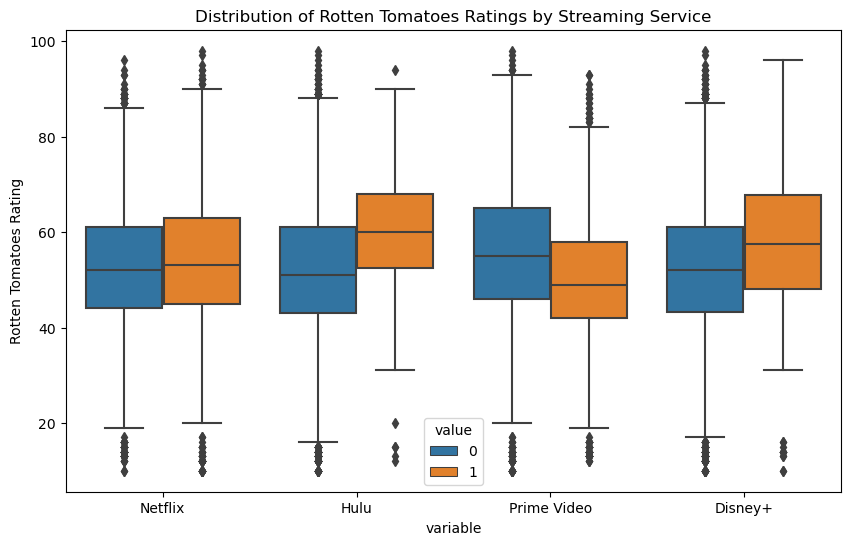

Minimum Age Required      0
Rotten Tomatoes Rating    0
Netflix                   0
Hulu                      0
Prime Video               0
Disney+                   0
dtype: int64


In [19]:
# Visualize the distribution of Rotten Tomatoes ratings by Streaming Service
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_notitle.melt(id_vars='Rotten Tomatoes Rating', value_vars=['Netflix', 'Hulu', 'Prime Video', 'Disney+']), 
            x='variable', y='Rotten Tomatoes Rating', hue='value')
plt.title('Distribution of Rotten Tomatoes Ratings by Streaming Service')
plt.show()

# Check for missing values
print(df_notitle.isnull().sum())

In [20]:
# Define features and target variable as the ratings
X = df_notitle.drop(columns=['Rotten Tomatoes Rating'])
y = df_notitle['Rotten Tomatoes Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (6655, 5), X_test shape: (2853, 5)
y_train shape: (6655,), y_test shape: (2853,)


In [21]:
# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluating factors
print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression R^2: {r2}")

Linear Regression MSE: 165.4681664276251
Linear Regression R^2: 0.08325396936278617


In [22]:
# Train the decision tree regressor model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree_reg.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Print the evaluating factors 
print(f"Decision Tree MSE: {mse_tree}")
print(f"Decision Tree R^2: {r2_tree}")

Decision Tree MSE: 138.2216684977439
Decision Tree R^2: 0.23420819436720086


In [23]:
# Get the coefficients from the linear regression model
coefficients = lin_reg.coef_
feature_names = X.columns

# Create a DataFrame to display the coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coef_df)

                Feature  Coefficient
0  Minimum Age Required     0.291723
1               Netflix     5.712640
2                  Hulu    11.705371
3           Prime Video     1.707201
4               Disney+    10.248823


In [24]:
# Get feature importances from the decision tree model
importances = tree_reg.feature_importances_
feature_names = X.columns

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(importance_df.sort_values(by='Importance', ascending=False))

                Feature  Importance
0  Minimum Age Required    0.678774
3           Prime Video    0.146042
4               Disney+    0.066160
2                  Hulu    0.062950
1               Netflix    0.046074


In [25]:
# Define features and target variable for minimum age requirement model
X_age = df_notitle.drop(columns=['Minimum Age Required'])
y_age = df_notitle['Minimum Age Required']

# Split the data into training and testing sets
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_age, y_age, test_size=0.3, random_state=42)

# Train the linear regression model
lin_reg_age = LinearRegression()
lin_reg_age.fit(X_train_age, y_train_age)

# Predict on the test set
y_pred_age = lin_reg_age.predict(X_test_age)

# Evaluate the model
mse_age = mean_squared_error(y_test_age, y_pred_age)
r2_age = r2_score(y_test_age, y_pred_age)

print(f"Linear Regression for Minimum Age Requirement MSE: {mse_age}")
print(f"Linear Regression for Minimum Age Requirement R^2: {r2_age}")

# Get the coefficients from the linear regression model
coefficients_age = lin_reg_age.coef_
feature_names_age = X_age.columns

# Create a DataFrame to display the coefficients
coef_df_age = pd.DataFrame({'Feature': feature_names_age, 'Coefficient': coefficients_age})
print(coef_df_age)

Linear Regression for Minimum Age Requirement MSE: 9.102551270252787
Linear Regression for Minimum Age Requirement R^2: 0.06273318079020418
                  Feature  Coefficient
0  Rotten Tomatoes Rating     0.016667
1                 Netflix    -0.020046
2                    Hulu     0.234847
3             Prime Video     0.022098
4                 Disney+    -2.548426


First focusing on the linear regression model we notice that Hulu seems to have the highest impact on movie ratings followed by Disney+, and from the decision tree we can see that there is a significance in the minimum age requirement but it shows the next significance as Prime Video and Disney+ being the movies with a high impact on movie ratings. While both of the models give different results, they both point towards Disney+ having the higher movie ratings which we can see a little bit in the first diagram. From the minimum age requirement model we see that Disney+ tends to have movies with lower age requirements and Hulu has a positive impact which means that they appeal to a broader age range (or maybe just higher).  From all of the information used above we can see that Netflix and Prime Video may need to increase the amount of movies they have with a high rating and that Disney+, while a known family company, may need to appeal to the older age groups as well as the younger to hold traction.
With all of that being said, all of these models showed to be a poor fit (with decision tree model performing better than linear regression) and cannot explain a large percentage of the data. With the use of two different models, this leads me to believe that more information may be necessary to include more factors that influence the ratings and age requirement relationships.